# Series de tiempo

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.dates import DateFormatter


In [2]:
dates = pd.date_range(start= '2023-01-01', periods=100)

values = np.random.rand(100).cumsum()#Genera datos sinteticos

data = pd.DataFrame({'Date': dates, 'Value': values})
data


,Date,Value
0,2023-01-01,0.631112
1,2023-01-02,1.287410
2,2023-01-03,1.495015
3,2023-01-04,2.140369
4,2023-01-05,2.272412
...,...,...
95,2023-04-06,52.600042
96,2023-04-07,52.703207
97,2023-04-08,52.984594
98,2023-04-09,53.569671


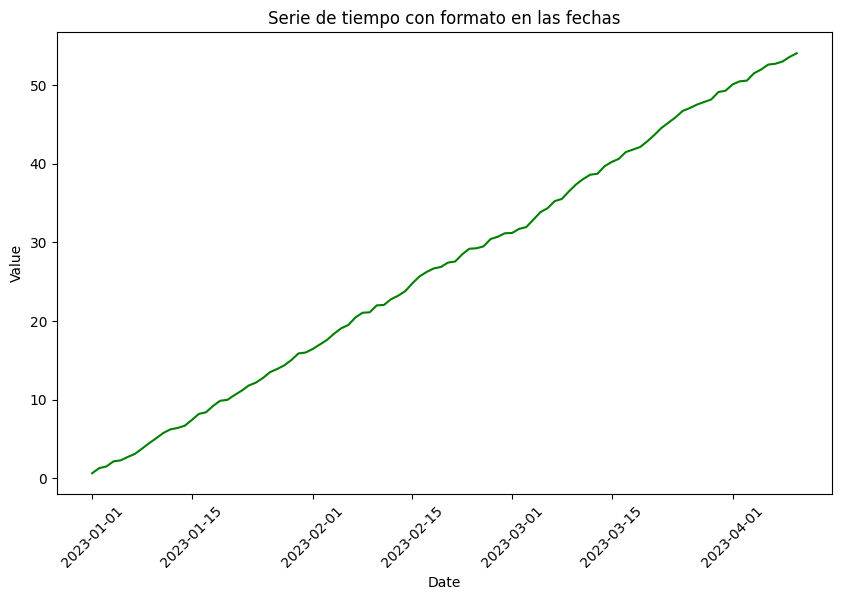

In [3]:
#Crear Gráfico de líneas
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(data['Date'], data['Value'], color = 'green')

plt.xticks(rotation=45)

plt.title('Serie de tiempo con formato en las fechas')
plt.xlabel('Date')
plt.ylabel('Value')

plt.show()

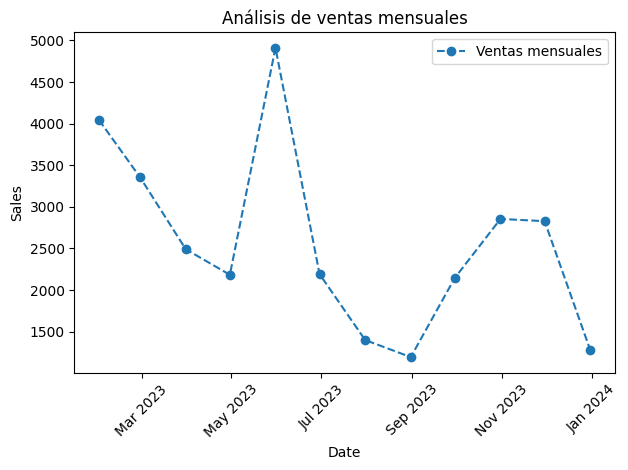

In [4]:
dates = pd.date_range(start='2023-01-01', periods=12, freq='ME')
sales = np.random.randint(1000, 5000, size=12)

sales_data = pd.DataFrame=({'Date': dates, 'Sales': sales})

plt.plot(sales_data['Date'],sales_data['Sales'], marker='o',
         linestyle = '--', label = 'Ventas mensuales')

plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))

plt.xticks(rotation=45)

plt.title('Análisis de ventas mensuales')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.legend()

plt.tight_layout()

plt.show()

In [5]:
#Libreria con dataset de pruebas
!pip install pydataset
from pydataset import data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 82.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939417 sha256=005da63c999db68a0694b6dc09723f5239dc56c15b161b01a018a2a14de71387
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


In [6]:
# Mostrar todos los datasets disponibles
available_datasets = data()
print(available_datasets)

        dataset_id                                             title
0    AirPassengers       Monthly Airline Passenger Numbers 1949-1960
1          BJsales                 Sales Data with Leading Indicator
2              BOD                         Biochemical Oxygen Demand
3     Formaldehyde                     Determination of Formaldehyde
4     HairEyeColor         Hair and Eye Color of Statistics Students
..             ...                                               ...
752        VerbAgg                  Verbal Aggression item responses
753           cake                 Breakage Angle of Chocolate Cakes
754           cbpp                 Contagious bovine pleuropneumonia
755    grouseticks  Data on red grouse ticks from Elston et al. 2001
756     sleepstudy       Reaction times in a sleep deprivation study

[757 rows x 2 columns]


In [7]:
# Cargar el dataset 'co2'
co2_dataset = data('co2')
print(co2_dataset.head())

          time     co2
1  1959.000000  315.42
2  1959.083333  316.31
3  1959.166667  316.50
4  1959.250000  317.56
5  1959.333333  318.13


In [8]:
# AGREGADO

def convert_fractional_year_to_datetime(year):
    year_int = int(year)
    fraction = year - year_int
    start_date = pd.Timestamp(year=year_int, month=1, day=1)
    end_date = pd.Timestamp(year=year_int + 1, month=1, day=1)
    delta = end_date - start_date
    date = start_date + pd.to_timedelta(delta.days * fraction, unit='D')
    return date

# Apply the conversion to the 'time' column and format the date
co2_dataset['date'] = co2_dataset['time'].apply(lambda x: convert_fractional_year_to_datetime(x).strftime('%d-%m-%Y'))
print(co2_dataset.head())

          time     co2        date
1  1959.000000  315.42  01-01-1959
2  1959.083333  316.31  31-01-1959
3  1959.166667  316.50  02-03-1959
4  1959.250000  317.56  02-04-1959
5  1959.333333  318.13  02-05-1959


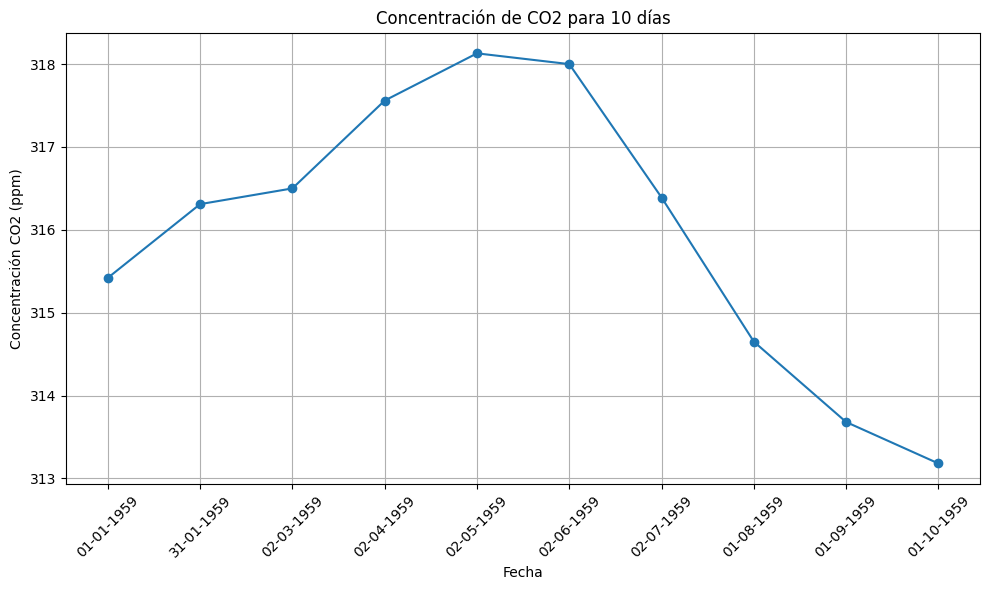

In [9]:
# AGREGADO

df_10_days = co2_dataset.head(10)

plt.figure(figsize=(10, 6))
plt.plot(df_10_days['date'], df_10_days['co2'], marker='o', linestyle='-')
plt.xlabel('Fecha')
plt.ylabel('Concentración CO2 (ppm)')
plt.title('Concentración de CO2 para 10 días')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

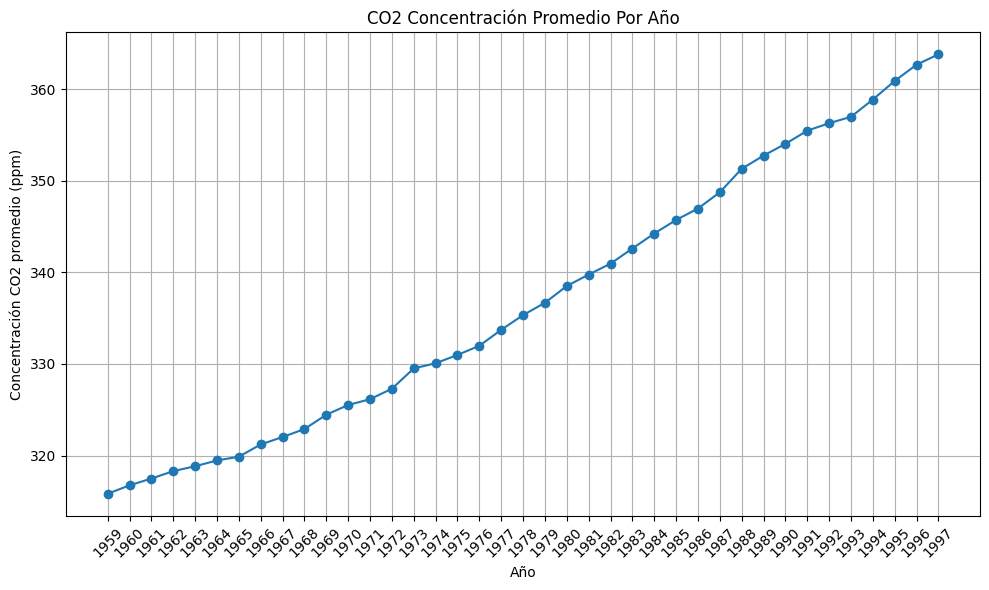

In [10]:
# AGREGADO

# Function to convert fractional years to datetime
def convert_fractional_year_to_datetime(year):
    year_int = int(year)
    fraction = year - year_int
    start_date = pd.Timestamp(year=year_int, month=1, day=1)
    end_date = pd.Timestamp(year=year_int + 1, month=1, day=1)
    delta = end_date - start_date
    date = start_date + pd.to_timedelta(delta.days * fraction, unit='D')
    return date

# Apply the conversion to the 'time' column
co2_dataset['date'] = co2_dataset['time'].apply(convert_fractional_year_to_datetime)

# Ensure 'date' column is in datetime format (this step is actually redundant since the conversion function returns datetime objects)
# df['date'] = pd.to_datetime(df['date'])

# Extract the year from the datetime
co2_dataset['year'] = co2_dataset['date'].dt.year

# Calculate the average CO2 concentration for each year
yearly_avg_co2 = co2_dataset.groupby('year')['co2'].mean().reset_index()

# Plot the average CO2 concentration for each year
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_co2['year'], yearly_avg_co2['co2'], marker='o', linestyle='-')
plt.xlabel('Año')
plt.ylabel('Concentración CO2 promedio (ppm)')
plt.title('CO2 Concentración Promedio Por Año')
plt.grid(True)
plt.xticks(yearly_avg_co2['year'], rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

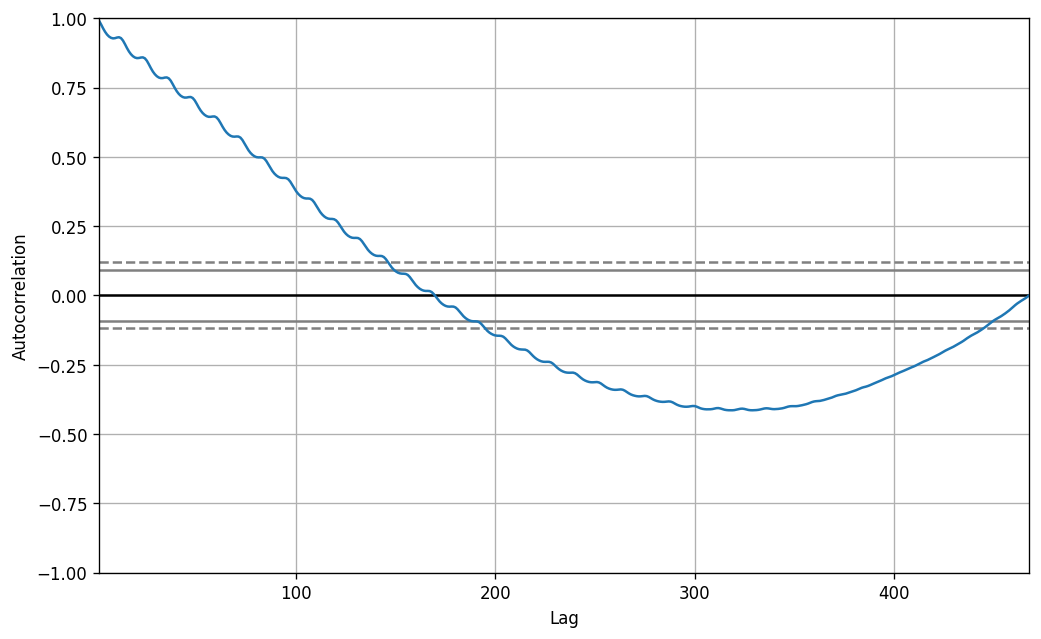

In [12]:
# AGREGADO

# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(co2_dataset['co2'].tolist())

# De acuerdo con ejemplo planteado en https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python

In [13]:

# Filtrar por datasets que contienen "car"
filtered_datasets = available_datasets[available_datasets['title'].str.contains('car', case=False)]
print(filtered_datasets)



      dataset_id                                                              title
31          cars                               Speed and Stopping Distances of Cars
47        mtcars                                         Motor Trend Car Road Tests
75          amis                                     Car Speeding and Warning Signs
90   co.transfer                                           Carbon Monoxide Transfer
93          dogs                                     Cardiac Data for Domestic Dogs
155      carrots                                          Insect Damages on Carrots
179     toxicity                                  Toxicity of Carboxylic Acids Data
273          Car                                  Stated Preferences for Car Choice
281        Crime                                            Crime in North Carolina
314       MedExp                               Structure of Demand for Medical Care
382          mpg  Fuel economy data from 1999 and 2008 for 38 popular models

In [ ]:
# Cargar un dataset
cars_dataset = data('mtcars')
print(cars_dataset.head())

                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2
